In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings   
warnings.filterwarnings('ignore') 

In [2]:
df = pd.read_excel("Iris1.xlsx")
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<Figure size 1000x1000 with 0 Axes>

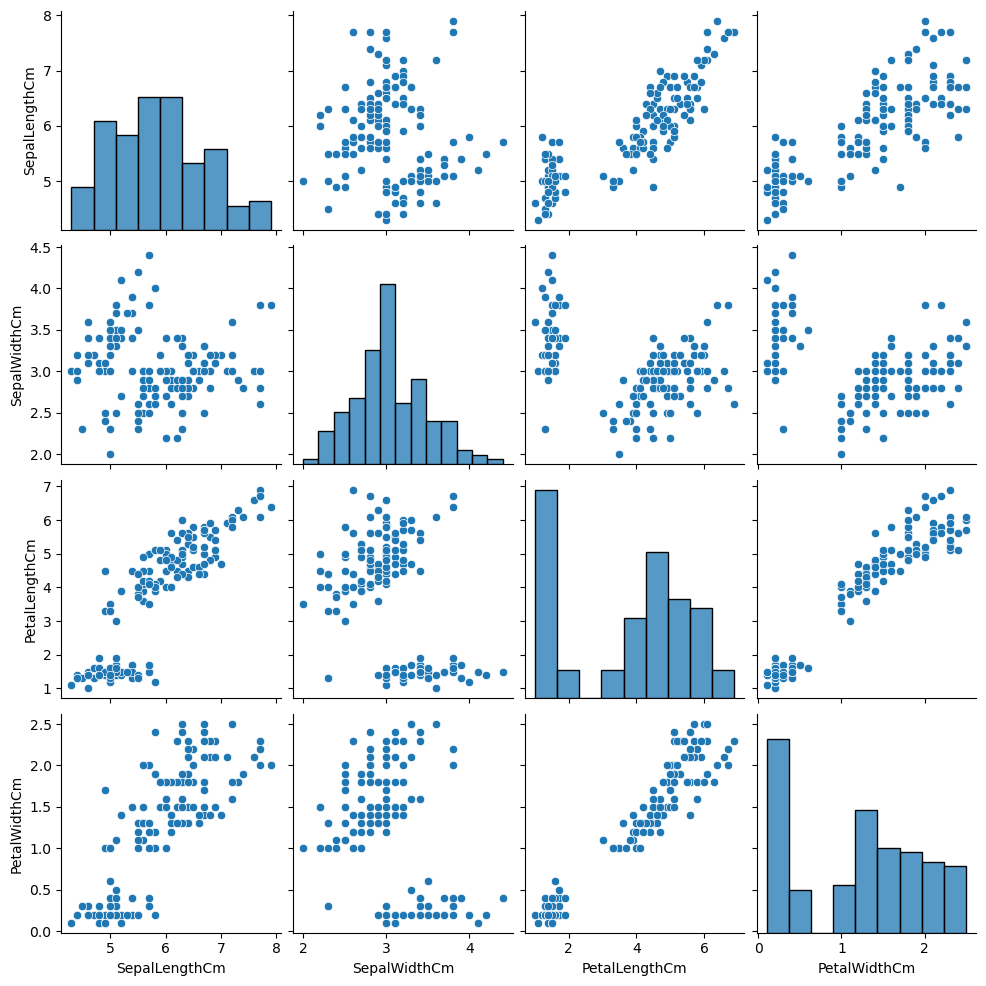

In [3]:
plt.figure(figsize=(10,10))
sns.pairplot(data=df)
plt.show()

In [4]:
from sklearn.cluster import KMeans

In [5]:
wcss = []

for i in range (2,21):
    km = KMeans(n_clusters=i,init='k-means++')
    km.fit(df)
    wcss.append(km.inertia_)

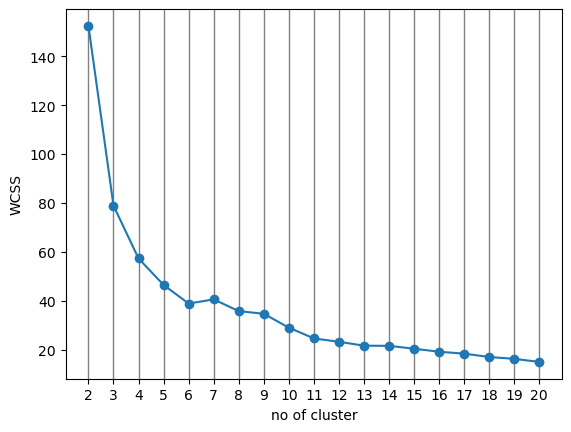

In [6]:
plt.plot([i for i in range(2,21)],wcss, marker="o")
plt.xlabel("no of cluster")
plt.xticks([i for i in range(2,21)])
plt.ylabel("WCSS")
plt.grid(color='Grey',axis = "x", linewidth=1)
plt.show()

In [13]:
from sklearn.metrics import silhouette_score

In [7]:
kmn = KMeans(n_clusters=3)
df["Predict"] = kmn.fit_predict(df)

In [14]:
kmn.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [16]:
silhouette_score(df,labels=kmn.labels_)

0.6126634972047179

In [8]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Predict
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


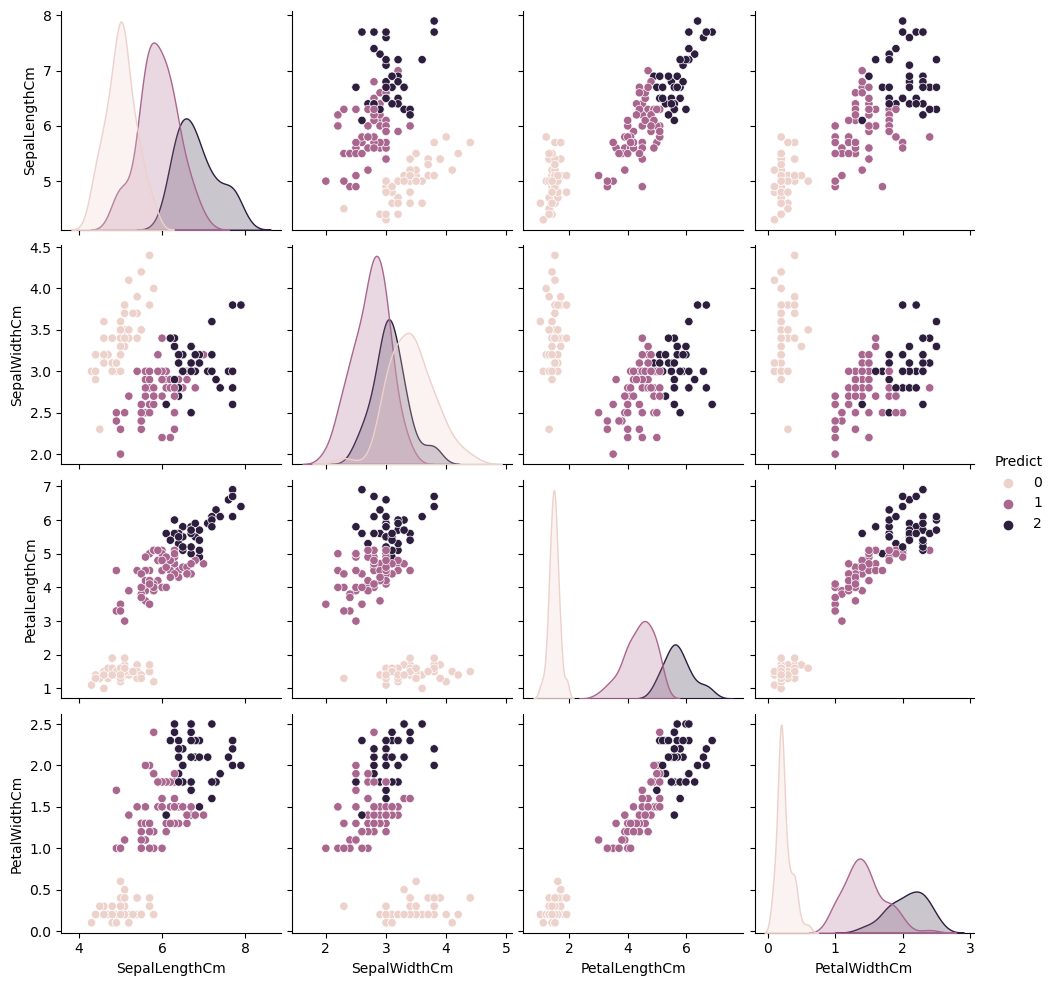

In [9]:
sns.pairplot(data=df,hue="Predict")
plt.show()

In [10]:
df1 = pd.read_excel("Iris.xlsx")

In [11]:
df1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


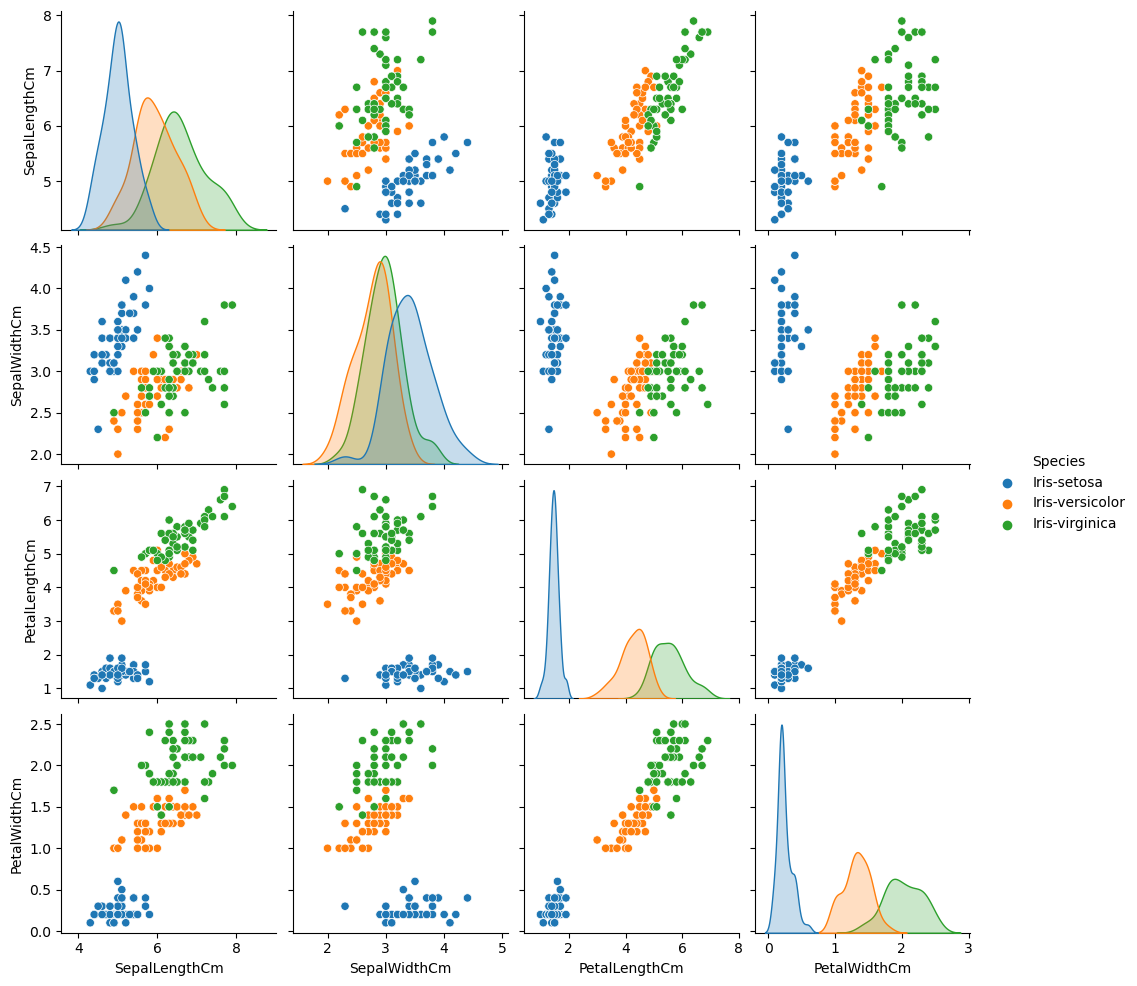

In [19]:
sns.pairplot(data=df1,hue="Species")
plt.show()

In [20]:
ss = []
no_c = [j for j in range(2,21)]
for i in range(2,21):
    km1 = KMeans(n_clusters=i)
    km1.fit(df)
    ss.append(silhouette_score(df,km1.labels_))

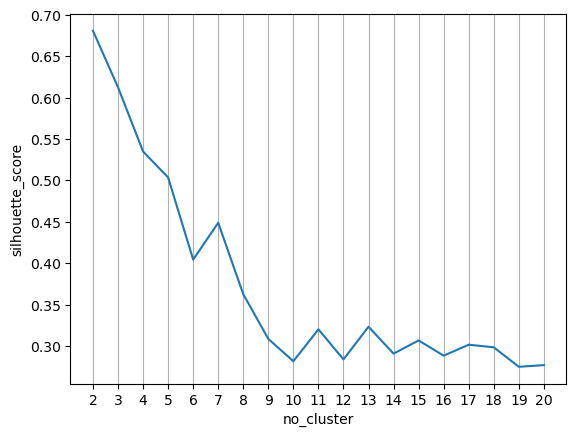

In [25]:
plt.plot(no_c,ss)
plt.xlabel("no_cluster")
plt.ylabel("silhouette_score")
plt.xticks(no_c)
plt.grid(axis="x")
plt.show()